# Exploratory Data Analysis (EDA)

In [281]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [282]:
# Load weather data
conn_weather = sqlite3.connect('data/weather.db')
query = 'SELECT * FROM weather'
weather_df= pd.read_sql_query(query, conn_weather)

conn_weather.close()


In [283]:
# Load air quality data
conn_air = sqlite3.connect('data/air_quality.db')
query = 'SELECT * FROM air_quality'
air_df = pd.read_sql_query(query, conn_air)

conn_air.close()

## inspect data

In [284]:
weather_df.head()

,data_ref,date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Min Temperature (deg C),Maximum Temperature (deg C),Min Wind Speed (km/h),Max Wind Speed (km/h),Sunshine Duration (hrs),Cloud Cover (%),Wet Bulb Temperature (deg F),Relative Humidity (%),Air Pressure (hPa),Dew Point Category,Wind Direction,Daily Solar Panel Efficiency
0,4d4d20c2-0167-4bc2-a62c-4df6e11fb2ea,01/04/2014,-,2,2,2,28.4,32.4,7.5,25.9,8.07,18.0,-59.3,100.0,1006,VH,W,High
1,c9d3c825-fd94-4e61-a4bc-2cf0f2208de0,02/04/2014,0,0,0,--,28.8,32.6,--,33.1,7.57,23.0,59.2,100.0,1005,Very High,S,Medium
2,6d445ffb-d4c2-4f94-a27e-224fabe46d10,03/04/2014,0,0,0,0,29.3,--,--,43.2,6.72,16.0,59.7,98.5,1005,Low,E,Medium
3,7a404c50-710f-451a-9a42-a66bb783a3d0,04/04/2014,0,0,0,0,28.6,32.4,7.4,33.1,7.55,20.0,59.1,100.0,1011,Very High,W,Medium
4,0d3194a7-ad1a-456e-9bf8-b1bae730977b,05/04/2014,23.4,15.2,17.2,17.4,26.4,28,5.4,28.1,5.27,74.0,58.9,100.0,1012,Very High,east,Low


In [285]:
air_df.head()

,data_ref,date,pm25_north,pm25_south,pm25_east,pm25_west,pm25_central,psi_north,psi_south,psi_east,psi_west,psi_central
0,4d4d20c2-0167-4bc2-a62c-4df6e11fb2ea,01/04/2014,20,16,18,23,19,58,56,57,66,59
1,c9d3c825-fd94-4e61-a4bc-2cf0f2208de0,02/04/2014,18,14,-,22,16,57,53,54,61,56
2,6d445ffb-d4c2-4f94-a27e-224fabe46d10,03/04/2014,12,12,10,14,10,55,53,52,59,54
3,7a404c50-710f-451a-9a42-a66bb783a3d0,04/04/2014,--,-,24,19,25,58,57,55,-,56
4,0d3194a7-ad1a-456e-9bf8-b1bae730977b,05/04/2014,18,19,21,13,17,64,64,66,-,66


1. both dataset contains '-' and '--' values for numeric features
2. since both dataset has the feature 'date', I am going to merge the 2 datasets 
using 'date' feature. This is to create a more comprehensive dataset that includes all 
relevant feature and generate more accurate models.

In [286]:
print("dimension of air_df: " + str(air_df.shape))
print("dimension of weather_df: " + str(weather_df.shape))

dimension of air_df: (3875, 12)
dimension of weather_df: (3517, 18)


number of records is 3517 for weather dataset and 3875 for air dataset. 
It might be hard to merge the datasets later on. 

In [287]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3517 entries, 0 to 3516
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   data_ref                       3517 non-null   object 
 1   date                           3517 non-null   object 
 2   Daily Rainfall Total (mm)      3517 non-null   object 
 3   Highest 30 Min Rainfall (mm)   3517 non-null   object 
 4   Highest 60 Min Rainfall (mm)   3517 non-null   object 
 5   Highest 120 Min Rainfall (mm)  3517 non-null   object 
 6   Min Temperature (deg C)        3517 non-null   object 
 7   Maximum Temperature (deg C)    3517 non-null   object 
 8   Min Wind Speed (km/h)          3517 non-null   object 
 9   Max Wind Speed (km/h)          3502 non-null   object 
 10  Sunshine Duration (hrs)        3501 non-null   float64
 11  Cloud Cover (%)                3501 non-null   float64
 12  Wet Bulb Temperature (deg F)   3517 non-null   f

In [288]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data_ref      3875 non-null   object
 1   date          3875 non-null   object
 2   pm25_north    3836 non-null   object
 3   pm25_south    3836 non-null   object
 4   pm25_east     3836 non-null   object
 5   pm25_west     3836 non-null   object
 6   pm25_central  3836 non-null   object
 7   psi_north     3836 non-null   object
 8   psi_south     3836 non-null   object
 9   psi_east      3836 non-null   object
 10  psi_west      3836 non-null   object
 11  psi_central   3836 non-null   object
dtypes: object(12)
memory usage: 363.4+ KB


## Cleaning data

Some features in weather dataset and all features in air_quality dataset has \
object dtype when it is numeric. So i choose to convert it to numeric dtype for \
accurate data analysis. 

### 1. replacing non numeric values of numeric features with NaN

In [289]:
air_df.replace(['-', '--'], np.nan, inplace=True)
weather_df.replace(['-', '--'], np.nan, inplace=True)

### 2. converting object dtype to numeric dtype for some features 
This allows more accurate analysis later (statistics & charts)

In [290]:
# Define columns to convert to numeric
air_numeric_columns = [
    'pm25_north', 'pm25_south', 'pm25_east', 'pm25_west', 'pm25_central',
    'psi_north', 'psi_south', 'psi_east', 'psi_west', 'psi_central'
]
    
# Convert columns to numeric
for column in air_numeric_columns:
    air_df[column] = pd.to_numeric(air_df[column], errors='coerce')

In [291]:
# Define columns to convert to numeric in weather data
weather_numeric_columns = [
    'Daily Rainfall Total (mm)',
    'Highest 30 Min Rainfall (mm)',
    'Highest 60 Min Rainfall (mm)',
    'Highest 120 Min Rainfall (mm)',
    'Min Temperature (deg C)',
    'Maximum Temperature (deg C)',
    'Min Wind Speed (km/h)',
    'Max Wind Speed (km/h)'
]

# Convert specified columns to numeric in weather data
for column in weather_numeric_columns:
    weather_df[column] = pd.to_numeric(weather_df[column], errors='coerce')

In [292]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data_ref      3875 non-null   object 
 1   date          3875 non-null   object 
 2   pm25_north    3462 non-null   float64
 3   pm25_south    3461 non-null   float64
 4   pm25_east     3461 non-null   float64
 5   pm25_west     3463 non-null   float64
 6   pm25_central  3467 non-null   float64
 7   psi_north     3480 non-null   float64
 8   psi_south     3471 non-null   float64
 9   psi_east      3458 non-null   float64
 10  psi_west      3473 non-null   float64
 11  psi_central   3464 non-null   float64
dtypes: float64(10), object(2)
memory usage: 363.4+ KB


In [293]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3517 entries, 0 to 3516
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   data_ref                       3517 non-null   object 
 1   date                           3517 non-null   object 
 2   Daily Rainfall Total (mm)      3176 non-null   float64
 3   Highest 30 Min Rainfall (mm)   3156 non-null   float64
 4   Highest 60 Min Rainfall (mm)   3155 non-null   float64
 5   Highest 120 Min Rainfall (mm)  3167 non-null   float64
 6   Min Temperature (deg C)        3179 non-null   float64
 7   Maximum Temperature (deg C)    3171 non-null   float64
 8   Min Wind Speed (km/h)          3170 non-null   float64
 9   Max Wind Speed (km/h)          3147 non-null   float64
 10  Sunshine Duration (hrs)        3501 non-null   float64
 11  Cloud Cover (%)                3501 non-null   float64
 12  Wet Bulb Temperature (deg F)   3517 non-null   f

### 3. Remove duplicates

In [294]:
print("number of duplicates in weather_df: " + str(weather_df.duplicated().sum()))
print("number of duplicates in air_df: " + str(air_df.duplicated().sum()))

number of duplicates in weather_df: 320
number of duplicates in air_df: 639


In [295]:
weather_df = weather_df.drop_duplicates()
air_df = air_df.drop_duplicates()

I am going to merge the two datasets using the 'date' feature, 
so I would want to clean up the 'date' duplicates 
so there are lesser issues later on

In [296]:
print("number of records with same date in weather_df: " + str(weather_df.duplicated('date').sum()))
print("number of records with same date in air_df: " + str(air_df.duplicated('date').sum()))

number of records with same date in weather_df: 0
number of records with same date in air_df: 39


Since there are only 39 date duplicates in air_df, I will just remove it.

In [297]:
air_df = air_df.drop_duplicates('date')

In [298]:
print("dimension of air_df: " + str(air_df.shape))
print("dimension of weather_df: " + str(weather_df.shape))

dimension of air_df: (3197, 12)
dimension of weather_df: (3197, 18)


After removing duplicates, there are equal number of records in both dataset. \
It will be easier to merge the datasets. 

### 4. Handling missing values

In [299]:
weather_df.isnull().sum()

data_ref                           0
date                               0
Daily Rainfall Total (mm)        312
Highest 30 Min Rainfall (mm)     318
Highest 60 Min Rainfall (mm)     321
Highest 120 Min Rainfall (mm)    316
Min Temperature (deg C)          314
Maximum Temperature (deg C)      314
Min Wind Speed (km/h)            319
Max Wind Speed (km/h)            328
Sunshine Duration (hrs)           13
Cloud Cover (%)                   13
Wet Bulb Temperature (deg F)       0
Relative Humidity (%)              0
Air Pressure (hPa)                 0
Dew Point Category                 0
Wind Direction                     0
Daily Solar Panel Efficiency       0
dtype: int64

In [300]:
air_df.isnull().sum()

data_ref          0
date              0
pm25_north      345
pm25_south      349
pm25_east       344
pm25_west       347
pm25_central    348
psi_north       310
psi_south       307
psi_east        312
psi_west        310
psi_central     316
dtype: int64

Each features with missing values are :
1. of float dtype
2. has around 10% missing values

I decided to replace the missing values with mean value for each feature.

In [313]:
# replace missing values in weather_df
weather_float_cols = weather_df.select_dtypes(include=['float64']).columns
weather_df[weather_float_cols] = weather_df[weather_float_cols].fillna(weather_df[weather_float_cols].mean())

In [314]:
# replace missing values in air_df
air_float_cols = air_df.select_dtypes(include=['float64']).columns
air_df[air_float_cols] = air_df[air_float_cols].fillna(air_df[air_float_cols].mean())

## 5. Merge datasets

In [315]:
# Convert date columns pandas datetime object
weather_df['date'] = pd.to_datetime(weather_df['date'], format='%d/%m/%Y')
air_df['date'] = pd.to_datetime(air_df['date'], format='%d/%m/%Y')


In [316]:
# Merge the datasets on the date column using an outer join
merged_df = pd.merge(weather_df, air_df, on='date', how='outer')

In [317]:
merged_df.describe()

,date,Daily Rainfall Total (mm),Highest 30 Min Rainfall (mm),Highest 60 Min Rainfall (mm),Highest 120 Min Rainfall (mm),Min Temperature (deg C),Maximum Temperature (deg C),Min Wind Speed (km/h),Max Wind Speed (km/h),Sunshine Duration (hrs),...,pm25_north,pm25_south,pm25_east,pm25_west,pm25_central,psi_north,psi_south,psi_east,psi_west,psi_central
count,3197,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.00000,3197.000000,3197.000000,3197.000000,...,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,2018-08-16 00:00:00,5.228007,3.128413,3.752851,4.342208,28.072806,31.73375,8.787943,29.916765,7.021734,...,14.859923,14.579529,14.441991,13.601579,14.126009,51.627122,50.462630,50.744541,48.224801,50.075842
min,2014-04-01 00:00:00,0.000000,0.000000,0.000000,0.000000,23.000000,23.70000,0.400000,-59.800000,0.000000,...,4.000000,3.000000,3.000000,2.000000,3.000000,18.000000,16.000000,17.000000,15.000000,17.000000
25%,2016-06-08 00:00:00,0.000000,0.000000,0.000000,0.000000,27.400000,31.10000,6.500000,28.100000,6.710000,...,10.000000,9.000000,10.000000,8.000000,10.000000,44.000000,42.000000,44.000000,38.000000,43.000000
50%,2018-08-16 00:00:00,0.200000,0.200000,0.200000,0.200000,28.072806,31.80000,8.600000,31.000000,7.400000,...,14.000000,13.000000,13.000000,12.000000,13.000000,52.000000,50.462630,51.000000,48.224801,51.000000
75%,2020-10-23 00:00:00,5.228007,3.128413,3.752851,4.342208,28.800000,32.60000,10.400000,35.300000,7.840000,...,16.000000,16.000000,16.000000,15.000000,16.000000,57.000000,56.000000,56.000000,55.000000,56.000000
max,2022-12-31 00:00:00,210.600000,53.400000,73.800000,85.600000,30.700000,35.40000,21.400000,70.600000,9.150000,...,199.000000,235.000000,176.000000,197.000000,176.000000,265.000000,288.000000,253.000000,276.000000,238.000000
std,NaN,11.861919,6.269861,7.773747,9.020669,1.036434,1.40551,2.849365,13.901177,1.375994,...,9.920149,11.325328,10.217773,11.432255,8.749750,14.507236,15.777161,14.398720,17.026254,13.657310


In [327]:
print(pd.DataFrame({
    'Missing Values': merged_df.isnull().sum(),
    'Duplicated Values': merged_df.duplicated().sum()
}))

                               Missing Values  Duplicated Values
data_ref_x                                  0                  0
date                                        0                  0
Daily Rainfall Total (mm)                   0                  0
Highest 30 Min Rainfall (mm)                0                  0
Highest 60 Min Rainfall (mm)                0                  0
Highest 120 Min Rainfall (mm)               0                  0
Min Temperature (deg C)                     0                  0
Maximum Temperature (deg C)                 0                  0
Min Wind Speed (km/h)                       0                  0
Max Wind Speed (km/h)                       0                  0
Sunshine Duration (hrs)                     0                  0
Cloud Cover (%)                             0                  0
Wet Bulb Temperature (deg F)                0                  0
Relative Humidity (%)                       0                  0
Air Pressure (hPa)       

There are no missing values or duplicates

### 6. Feature selection

1. remove unnecessary features
2. remove features with high correlation with other features
3. remove data with low variance

In [335]:
irrelevant_features = ["data_ref_x", "data_ref_y", "date"]
merged_df.drop(columns=irrelevant_features, inplace=True)

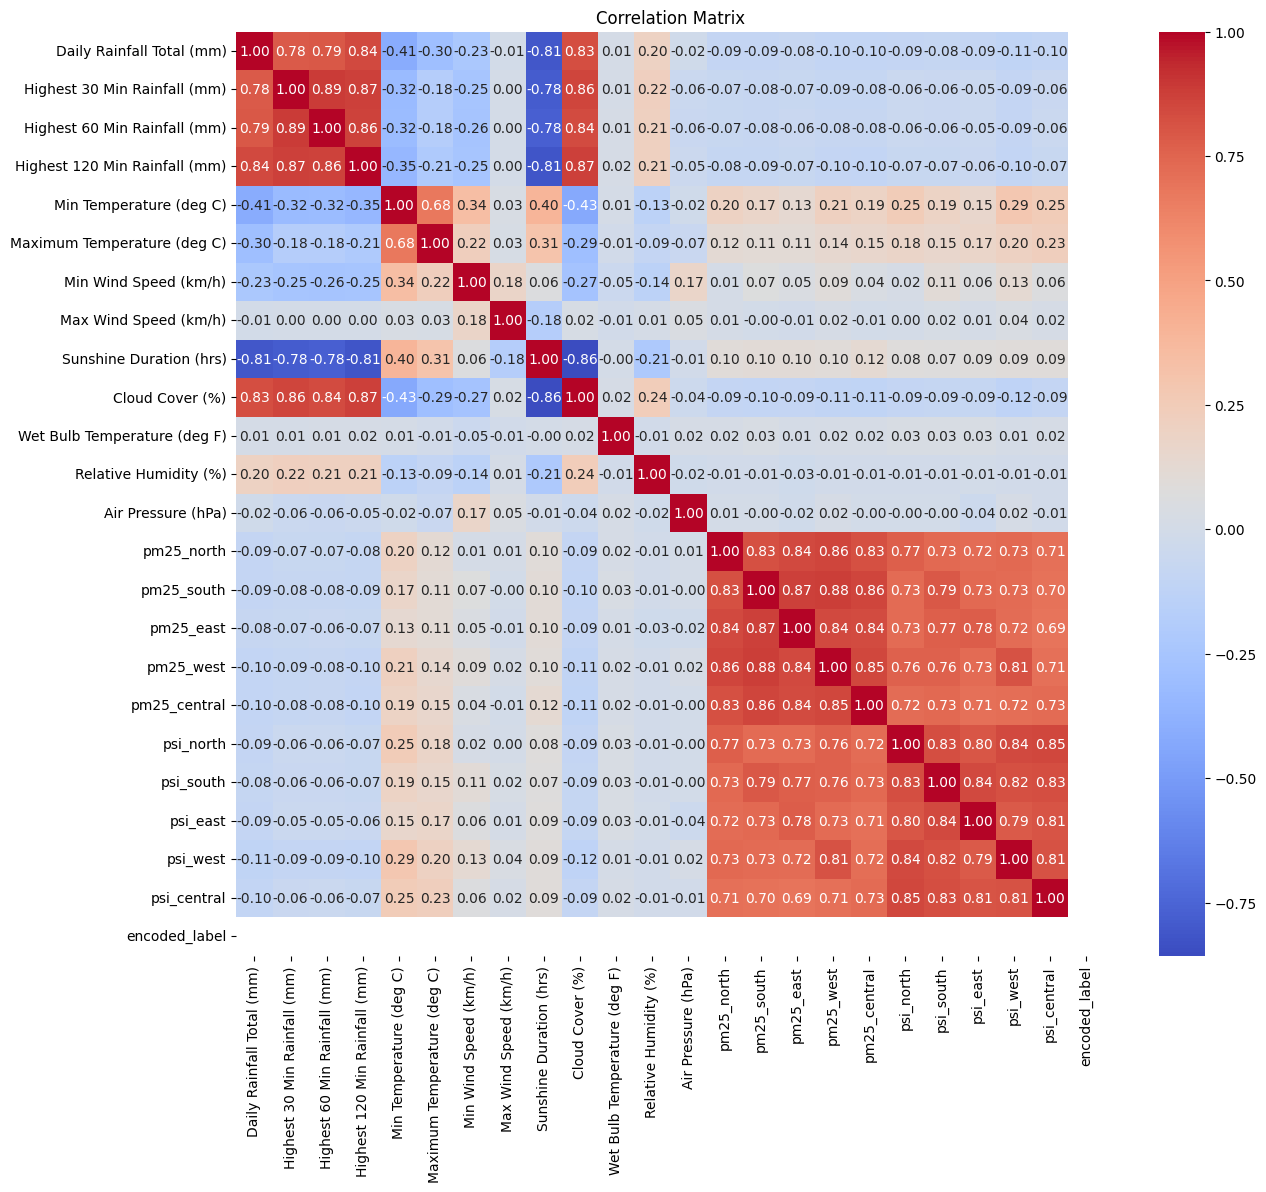

In [380]:
numeric_data = merged_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Correlation matrix visualization
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [379]:
# Find features with correlation greater than the threshold
correlation_threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]

print("\nHighly correlated features:")
for i in range (0, len(to_drop)):
    print(str(i + 1) + ". " + to_drop[i])


Highly correlated features:
1. Highest 60 Min Rainfall (mm)
2. Highest 120 Min Rainfall (mm)
3. Cloud Cover (%)
4. pm25_south
5. pm25_east
6. pm25_west
7. pm25_central
8. psi_south
9. psi_east
10. psi_west
11. psi_central


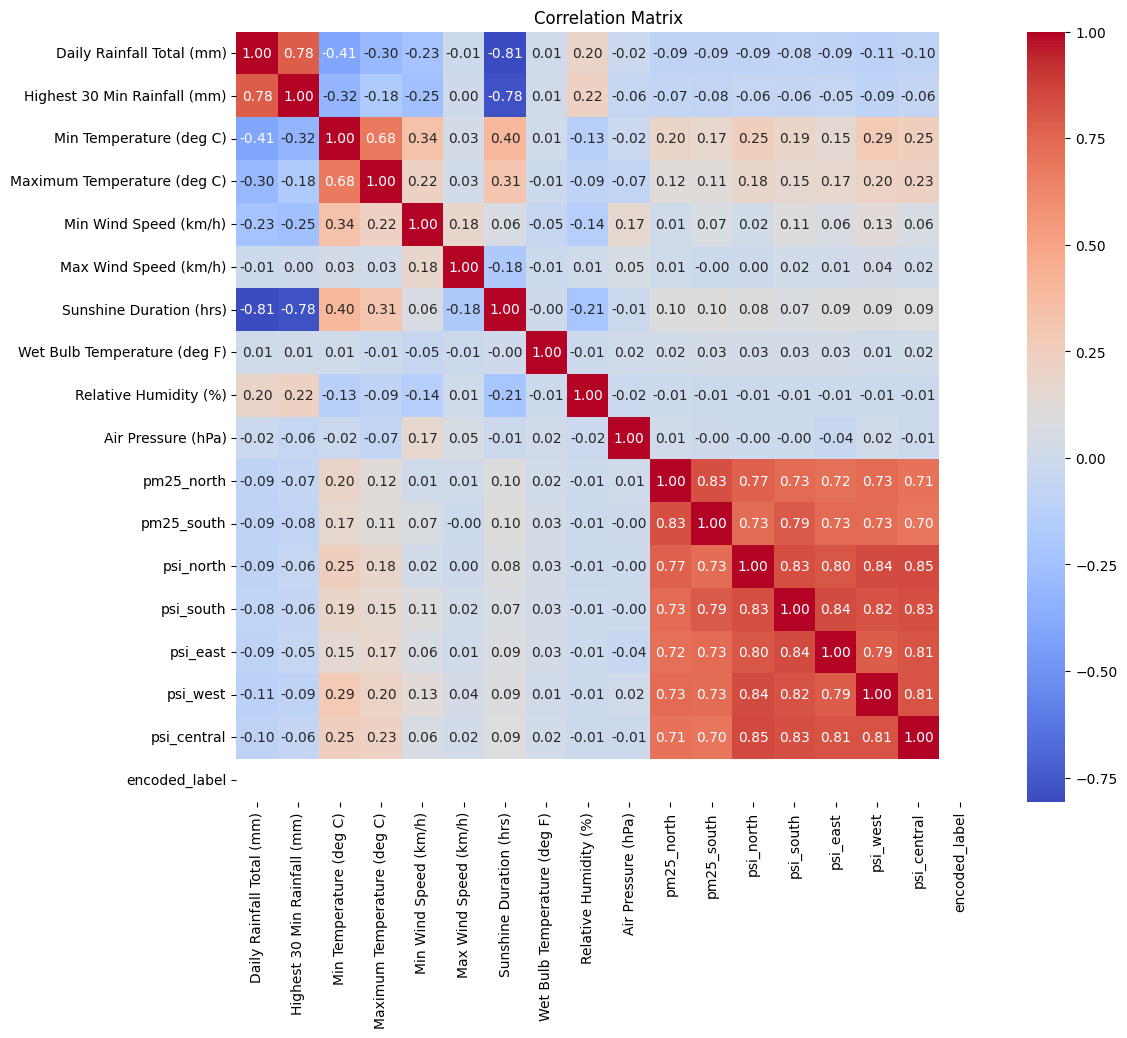

In [369]:
# Drop the highly correlated features
numeric_data.drop(columns=to_drop, inplace=True)
corr_matrix = numeric_data.corr()

# Correlation matrix visualization
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()